In [132]:
# Importações

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(0)

In [133]:
# Leitura de arquivos

testOriginal = pd.read_csv("Arquivos csv/test.csv")
trainOriginal = pd.read_csv("Arquivos csv/train.csv")
gender_submission = pd.read_csv("Arquivos csv/gender_submission.csv")

In [134]:
# Funções

def createPipelines(data, dataTest, encoder, model, numerical_imputer, categorical_imputer, submission):
    """"Essa função produz e avalia pipelines que utilizam estratégias indicadas
    nos argumentos passados e, como saída, retorna o resultado da avaliação em porcentagem"""
    # Definindo as features e o target que serão utilizados
    X = data.drop(['Survived'], axis = 1)
    y = data['Survived']
    
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, test_size = 0.2)
    
    # Pré-processamento de dados numéricos
    numerical_transformer = numerical_imputer
    
    # Pré-processamento de dados categóricos
    categorical_transformer = Pipeline(steps = [('imputer', categorical_imputer), 
                                                ('encoder', encoder)])
    
    # Pré-processamento de pacotes para dados numéricos e categóricos
    categorical_cols = list(X.select_dtypes(include = object).columns)
    numerical_cols = list(X.select_dtypes(include = [int, float]).columns)
    preprocessor = ColumnTransformer(transformers = [('num', numerical_transformer, numerical_cols),
                                                     ('cat', categorical_transformer, categorical_cols)])
    
    # Pré-processamento e modelagem em um pipeline
    my_pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                    ('model', model)])
    
    # Pré-processamento de dados de treinamento, modo de ajuste
    my_pipeline.fit(train_X, train_y)
    
    # Pré-processamento de dados de validação, obter previsões
    preds = my_pipeline.predict(val_X)

    # Avalie o modelo
    score = accuracy_score(val_y, preds)

    print("\nPorcentagem das predições que foram acertadas pelo modelo Pipelines é: {:.2f}%".format((score * 100)))

    # Pré-processamento de dados de validação, obter previsões do banco de teste
    preds = my_pipeline.predict(dataTest)
    
    # Junte o conjunto de dados original e o DataFrame de previsão usando a função "concat"
    # convertendo a lista preds em uma Serie
    submission['Survived'] = preds
    
    return (submission)


Análise: 
A chance de sobreviver aumenta se a pessoa for mais nova;

A chance de sobreviver aumenta se a pessoa for da 1ª classe;

A chance de sobreviver aumenta se a pessoa tiver menos irmãos/cônjuges a bordo;

A chance de sobreviver aumenta se a pessoa tiver menos pais/criança a bordo;


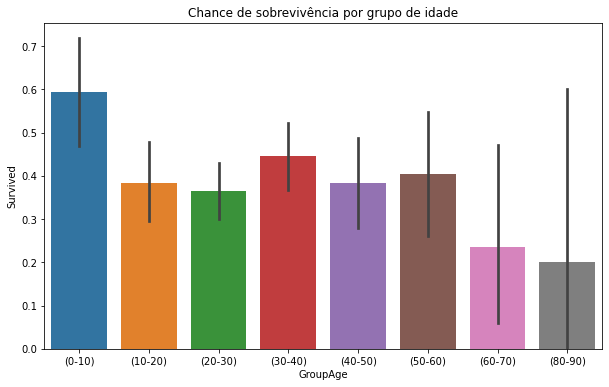

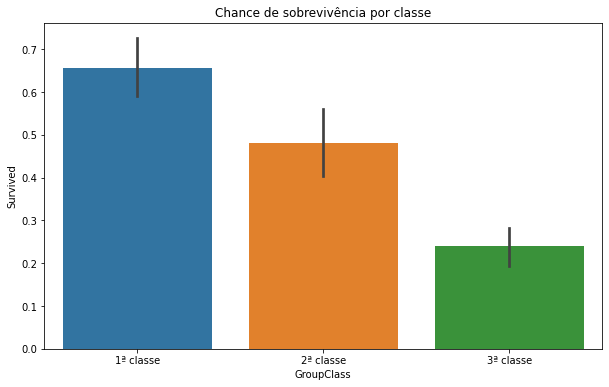

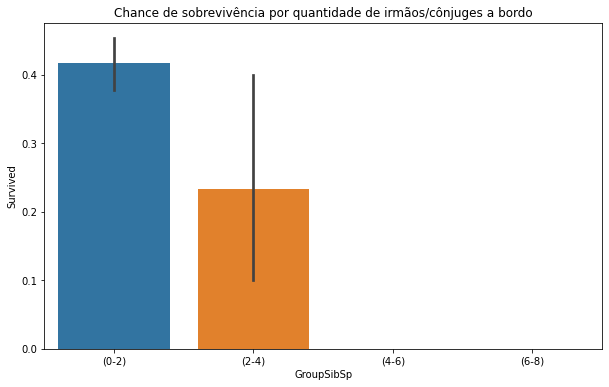

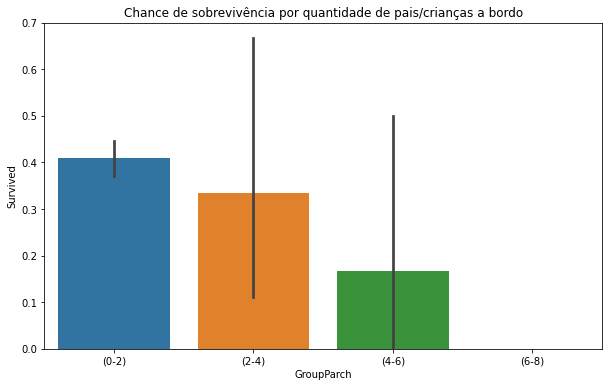

In [135]:
# Identificar as Features do banco de dados que são categóricas e as que são númericas
features_categoricas_test = []
features_numericas_test = []
for columns in testOriginal.columns:
    if testOriginal[columns].dtype == object:
        features_categoricas_test.append(columns)
    else:
        features_numericas_test.append(columns)
        
features_categoricas_train = []
features_numericas_train = []
for columns in trainOriginal.columns:
    if trainOriginal[columns].dtype == object:
        features_categoricas_train.append(columns)
    else:
        features_numericas_train.append(columns)

# Quais Features contém NaN e a quantidade em cada Feature
qtd = []
features_nan = []
features_nan_test = pd.DataFrame(columns = ['Columns', 'Quantidade'])
for columns in testOriginal.columns:
    if pd.isnull(testOriginal[columns]).sum() != 0:
        qtd.append(pd.isnull(testOriginal[columns]).sum())
        features_nan.append(columns)
        
features_nan_test = pd.DataFrame({'Columns': features_nan, 'Quantidade': qtd})

qtd = []
features_nan = []
for columns in trainOriginal.columns:
    if pd.isnull(trainOriginal[columns]).sum() != 0:
        qtd.append(pd.isnull(trainOriginal[columns]).sum())
        features_nan.append(columns)
        
features_nan_train = pd.DataFrame({'Columns': features_nan, 'Quantidade': qtd})

# Novos dataframes apenas com as features categoricas do banco de dados
test_new = testOriginal.drop(features_categoricas_test, axis = 1)
train_new = trainOriginal.drop(features_categoricas_train, axis = 1)

# Retirar as linhas que contenham NaN das features do banco de dados 'train.csv'
train_new = train_new.dropna(axis = 0)

# Subtituir os NaN pelo valor 0 no banco de dados de 'test.csv'
test_new = test_new.fillna(0)

# Feature Age
# Lista com os nomes que serão dados aos grupo em que as idades serão repartidas
grupo = ['(0-10)', '(10-20)', '(20-30)', '(30-40)', '(40-50)', '(50-60)','(60-70)', '(80-90)']

# Separando as idades dos dataframe
train_new['GroupAge'] = pd.cut(x=train_new['Age'], bins=[-1, 10, 20, 30, 40, 50, 60, 70, 80], labels=grupo)

# Gráfico que indica a chance de sobrevivência por grupo de idade
plt.figure(figsize = (10,6)) # Definindo tamanho da figura
plt.title("Chance de sobrevivência por grupo de idade") # Add título
sns.barplot(x = train_new['GroupAge'], y = train_new['Survived'])
print('\nAnálise: \nA chance de sobreviver aumenta se a pessoa for mais nova;')

# Feature Pclass
# Lista com os nomes que serão dados aos grupo em que as classes serão repartidas
grupo = ['1ª classe', '2ª classe', '3ª classe']

# Separando as idades dos dataframe
train_new['GroupClass'] = pd.cut(x=train_new['Pclass'], bins=[0, 1, 2, 3], labels=grupo)

# Gráfico que indica a chance de sobrevivência por grupo de idade
plt.figure(figsize = (10,6)) # Definindo tamanho da figura
plt.title("Chance de sobrevivência por classe") # Add título
sns.barplot(x = train_new['GroupClass'], y = train_new['Survived'])
print('\nA chance de sobreviver aumenta se a pessoa for da 1ª classe;')

# Feature SibSp
# Lista com os nomes que serão dados aos grupo em que as classes serão repartidas
grupo = ['(0-2)', '(2-4)', '(4-6)', '(6-8)']

# Separando as idades dos dataframe
train_new['GroupSibSp'] = pd.cut(x=train_new['SibSp'], bins=[-1, 2, 4, 6, 8], labels=grupo)

# Gráfico que indica a chance de sobrevivência por grupo de idade
plt.figure(figsize = (10,6)) # Definindo tamanho da figura
plt.title("Chance de sobrevivência por quantidade de irmãos/cônjuges a bordo") # Add título
sns.barplot(x = train_new['GroupSibSp'], y = train_new['Survived'])
print('\nA chance de sobreviver aumenta se a pessoa tiver menos irmãos/cônjuges a bordo;')

# Feature Parch
# Lista com os nomes que serão dados aos grupo em que as classes serão repartidas
grupo = ['(0-2)', '(2-4)', '(4-6)', '(6-8)']

# Separando as idades dos dataframe
train_new['GroupParch'] = pd.cut(x=train_new['Parch'], bins=[-1, 2, 4, 6, 8], labels=grupo)

# Gráfico que indica a chance de sobrevivência por grupo de idade
plt.figure(figsize = (10,6)) # Definindo tamanho da figura
plt.title("Chance de sobrevivência por quantidade de pais/crianças a bordo") # Add título
sns.barplot(x = train_new['GroupParch'], y = train_new['Survived'])
print('\nA chance de sobreviver aumenta se a pessoa tiver menos pais/criança a bordo;')

In [136]:
# Tratamento de valores em falta
test = testOriginal.drop(['Cabin', 'Ticket', 'Name'], axis = 1)
train = trainOriginal.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis = 1)

test['Fare'] = test['Fare'].fillna(test['Fare'].median())
train['Fare'] = train['Fare'].fillna(train['Fare'].median())

gender_submission = createPipelines(train,
                        test, 
                        OneHotEncoder(handle_unknown = 'ignore'), 
                        RandomForestClassifier(), 
                        SimpleImputer(strategy = 'most_frequent'),
                        SimpleImputer(strategy = 'most_frequent'),
                        gender_submission)


Porcentagem das predições que foram acertadas pelo modelo Pipelines é: 86.03%


In [137]:
print(gender_submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
